In [57]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**<h4>1. COMPARE PARAMETER VALUES</h4>**

**Choose desired parameter values and variables to plot below.**

In [40]:
# Parameter values
values = [0.25, 0.5]

# Variables to plot PLEASE CHOOSE 12 VARIABLES
varl = ['P_C','P_Y','P_Y_KL','Y','C','C_Y','K','ell','E','r_K','r_ell','r_E',]

**Choose desired parameter, specify a chock, and run the model (might take some time).**

In [59]:
s1={} # dict for sol
s2={} # dict for ss

for i,value in enumerate(values):
    
    from BabyMAKROModel import BabyMAKROModelClass
    
    model = BabyMAKROModelClass(name='baseline')
    
    par = model.par
    ss = model.ss
    sol = model.sol
    
    # choose parameter
    par.G_share_Y = value
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors(do_print=True)
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    Tshock = 20
    shock = 0.2*ss.r_E
    persistence = 0.75**np.arange(Tshock)
    sol.r_E[:Tshock] = ss.r_E + shock*persistence

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # save variables in dictonaries
    for var in varl:
        key = str(var+str(i)) 
        s1[key] = sol.__dict__[var]
        s2[key] = ss.__dict__[var]

bargaining_cond     : abs. max = 2.22e-16
Bq_match            : abs. max = 4.14e-12
FOC_capital_agency  : abs. max = 5.55e-16
FOC_K_ell           : abs. max = 2.22e-16
FOC_E_Y_KL          : abs. max = 1.67e-16
mkt_clearing        : abs. max = 0.00e+00
repacking_prices_C  : abs. max = 0.00e+00
initial:
   max. abs. error = 2.77e+01
    2.22e-16 in bargaining_cond
    1.04e+00 in Bq_match
    1.38e-02 in FOC_capital_agency
    2.22e-16 in FOC_K_ell
    7.02e-02 in FOC_E_Y_KL
    2.77e+01 in mkt_clearing
    4.80e-02 in repacking_prices_C

it = 0
 solve: t1-t0 = 0.3 secs
   max. abs. error = 2.77e+01
    5.83e-03 in bargaining_cond
    1.13e-01 in Bq_match
    2.41e-03 in FOC_capital_agency
    4.22e-03 in FOC_K_ell
    5.36e-03 in FOC_E_Y_KL
    2.74e+00 in mkt_clearing
    1.67e-03 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.3 secs
   max. abs. error = 2.74e+00
    3.32e-03 in bargaining_cond
    4.14e-02 in Bq_match
    8.55

**Plot the variables and see the effects of different parameter values.**

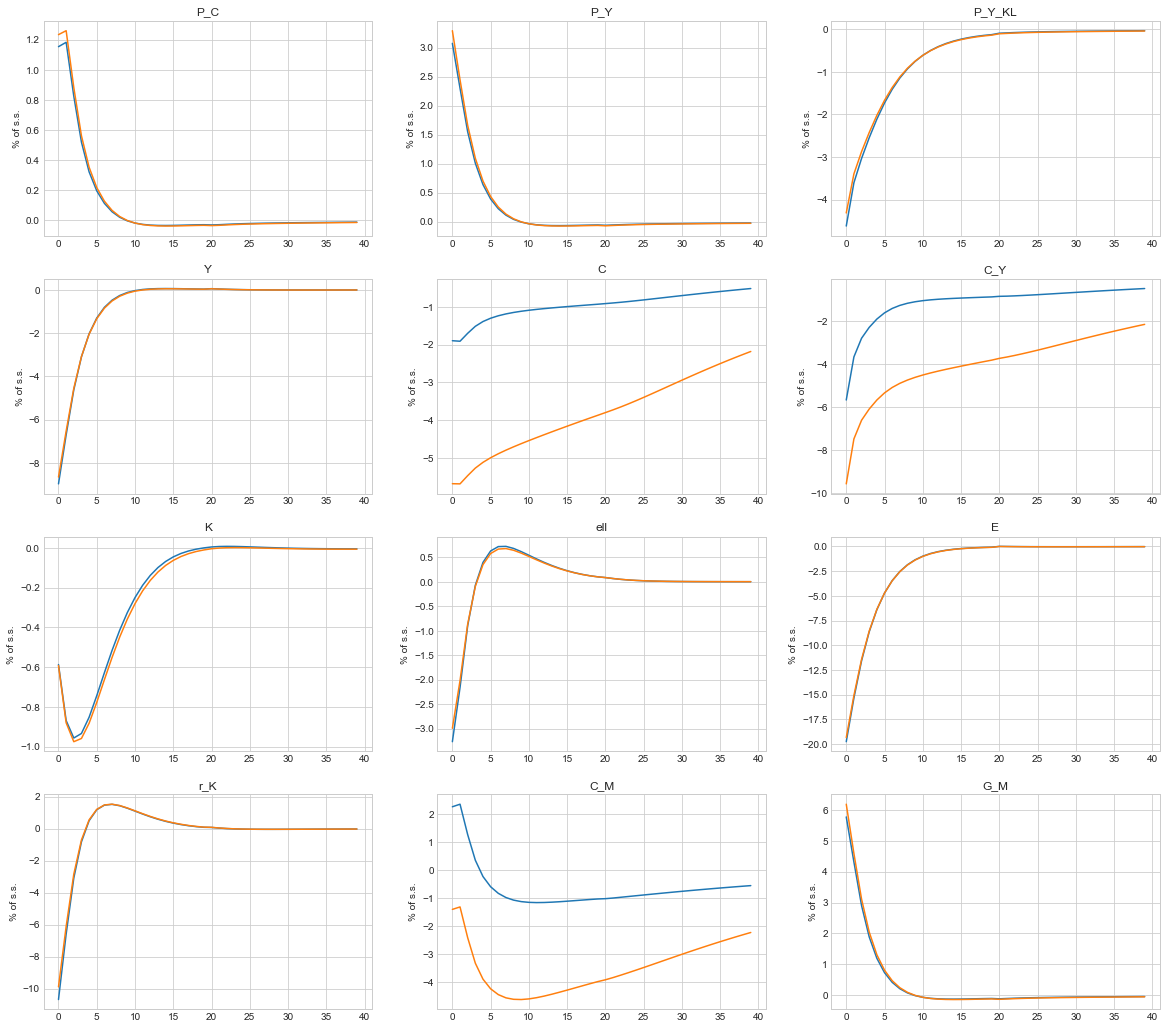

In [60]:
T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))
first_leg = mpatches.Patch(color='#1f77b4', label='Parameter value:'+str(values[0]))
second_leg = mpatches.Patch(color='#ff7f0e', label='Parameter value:'+str(values[1]))
thrid_leg = mpatches.Patch(color='#2ca02c', label='Parameter value:'+str(values[2]))


for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,value in enumerate(values):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)
    ax.legend(handles=[first_leg ,second_leg ,thrid_leg])


**<h4>2. COMPARE SHOCKS</h4>**

**Specify shocks and choose variables to plot below.**

In [49]:
# specify shocks
var_l = ['P_E','r_E'] # variables to shock
Tshock_l = [20,20, 20] # length of shock (periods)
shock_l = [0.01,0.01, 0.01] # shock as pct. of ss
pers_l = [0.75,0.75,0.75] # persistence of shock

# Variables to plot PLEASE CHOOSE 12 VARIABLES
varl = ['P_C','P_Y','P_Y_KL','Y','C','C_Y','K','ell','E','r_K','r_ell','r_E']

**Run model for each shock.**

In [50]:
s1={} # dict for sol
s2={} # dict for ss

for i,(var, Tshock, shock, pers) in enumerate(zip(var_l, Tshock_l, shock_l, pers_l)):
    
    from BabyMAKROModel import BabyMAKROModelClass
    
    model = BabyMAKROModelClass(name='baseline')
    
    par = model.par
    ss = model.ss
    sol = model.sol
    
    # run model in SS
    model.find_ss(0.50)
    model.set_exo_ss()
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors(do_print=True)
    
    # apply shock
    model.calc_jac()
    model.set_exo_ss()
    shock = shock*ss.__dict__[var]
    pers = pers**np.arange(Tshock)
    sol.__dict__[var][:Tshock] = ss.__dict__[var] + shock*pers

    # run model with shock
    model.set_unknowns_ss()
    model.evaluate_blocks()
    errors = model.get_errors()
    model.find_IRF()

    # save variables in dictonaries
    for var in varl:
        key = str(var+str(i)) 
        s1[key] = sol.__dict__[var]
        s2[key] = ss.__dict__[var]

bargaining_cond     : abs. max = 2.22e-16
Bq_match            : abs. max = 3.87e-12
FOC_capital_agency  : abs. max = 5.55e-16
FOC_K_ell           : abs. max = 2.22e-16
FOC_E_Y_KL          : abs. max = 1.67e-16
mkt_clearing        : abs. max = 0.00e+00
repacking_prices_C  : abs. max = 0.00e+00
initial:
   max. abs. error = 1.56e-01
    2.22e-16 in bargaining_cond
    6.41e-02 in Bq_match
    5.55e-16 in FOC_capital_agency
    2.22e-16 in FOC_K_ell
    1.67e-16 in FOC_E_Y_KL
    1.56e-01 in mkt_clearing
    0.00e+00 in repacking_prices_C

it = 0
 solve: t1-t0 = 0.3 secs
   max. abs. error = 1.56e-01
    4.55e-07 in bargaining_cond
    3.73e-05 in Bq_match
    1.37e-07 in FOC_capital_agency
    1.01e-07 in FOC_K_ell
    1.34e-07 in FOC_E_Y_KL
    9.25e-05 in mkt_clearing
    2.34e-07 in repacking_prices_C
 evaluate: t1-t0 = 0.0 secs
 update_jac: t1-t0 = 0.0 secs

it = 1
 solve: t1-t0 = 0.3 secs
   max. abs. error = 9.25e-05
    1.78e-09 in bargaining_cond
    1.05e-08 in Bq_match
    4.04

**Plot the variables and compare the shocks.**

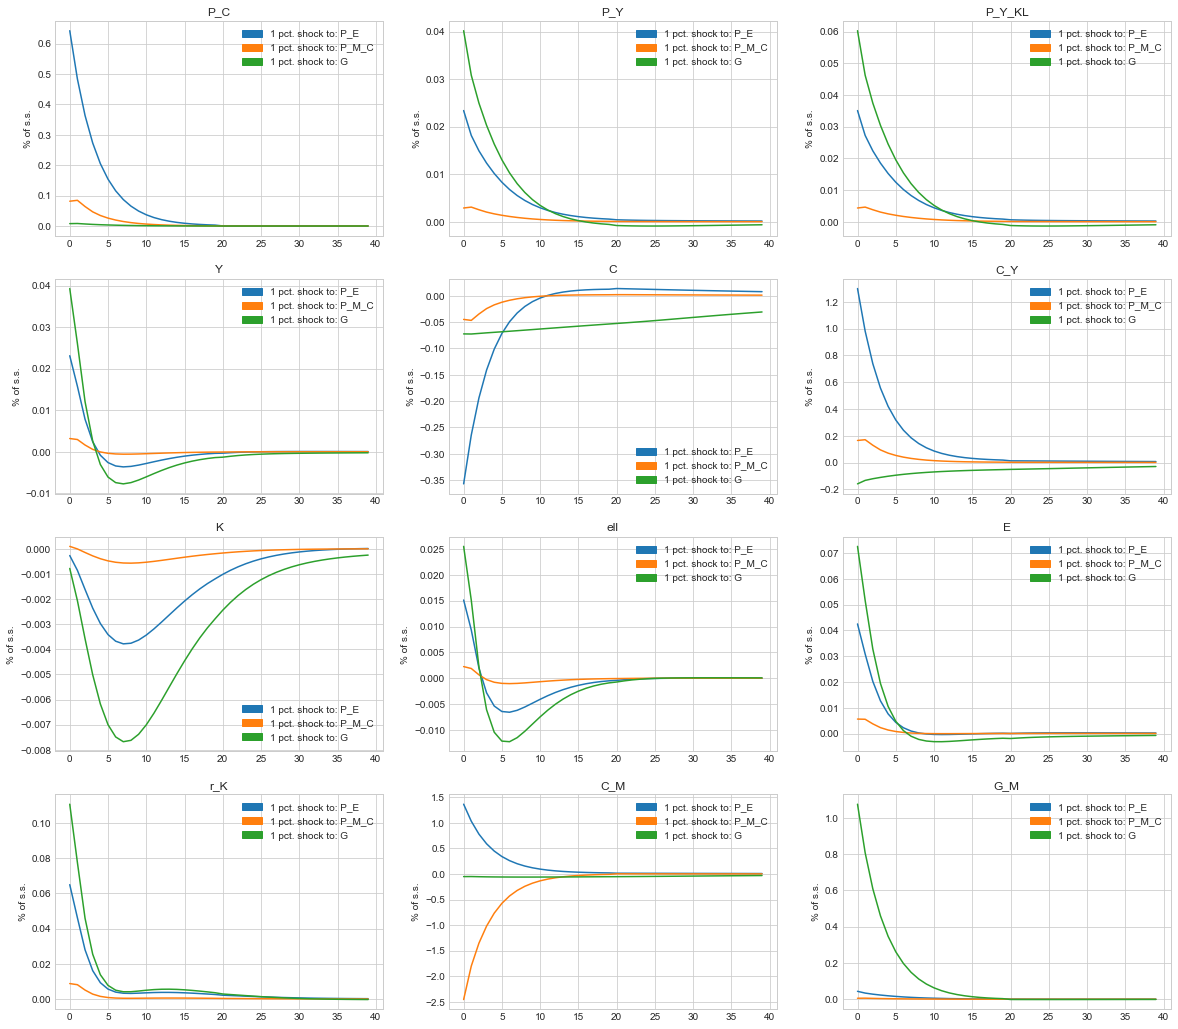

In [51]:
import matplotlib.patches as mpatches

T_IRF = 40

fig = plt.figure(figsize=(20,20/1.1))
first_leg = mpatches.Patch(color='#1f77b4', label='1 pct. shock to: '+str(var_l[0]))
second_leg = mpatches.Patch(color='#ff7f0e', label='1 pct. shock to: '+str(var_l[1]))
# third_leg = mpatches.Patch(color='#2ca02c', label='1 pct. shock to: '+str(var_l[2]))

for i,var in enumerate(varl):
    
    ax = fig.add_subplot(4,3,i+1)
    
    ax.set_ylabel('% of s.s.')
    ax.set_title(var)
     
    for j,value in enumerate(var_l):
        ax.plot((s1[str(var+str(j))][:T_IRF]/s2[str(var+str(j))]-1)*100)
    ax.legend(handles=[first_leg ,second_leg])


In [52]:
sol.C/sol.Y

array([0.31149067, 0.3115312 , 0.31157824, 0.3116112 , 0.31163196,
       0.31164452, 0.3116519 , 0.3116561 , 0.31165847, 0.31165988,
       0.31166087, 0.31166178, 0.31166279, 0.31166401, 0.31166547,
       0.31166718, 0.31166911, 0.31167125, 0.31167358, 0.31167608,
       0.31167895, 0.31168144, 0.31168412, 0.31168705, 0.31169021,
       0.31169356, 0.31169705, 0.31170065, 0.31170432, 0.31170804,
       0.31171176, 0.31171549, 0.31171919, 0.31172285, 0.31172647,
       0.31173003, 0.31173354, 0.31173697, 0.31174034, 0.31174364,
       0.31174686, 0.31175001, 0.31175309, 0.31175609, 0.31175903,
       0.31176189, 0.31176468, 0.3117674 , 0.31177006, 0.31177265,
       0.31177517, 0.31177763, 0.31178003, 0.31178237, 0.31178465,
       0.31178687, 0.31178903, 0.31179114, 0.3117932 , 0.3117952 ,
       0.31179715, 0.31179905, 0.31180091, 0.31180271, 0.31180447,
       0.31180619, 0.31180785, 0.31180948, 0.31181106, 0.3118126 ,
       0.31181411, 0.31181557, 0.31181699, 0.31181837, 0.31181

In [55]:
sol.Y/sol.C_Y

array([13.66543698, 13.66008914, 13.6564726 , 13.65382698, 13.65186045,
       13.65040724, 13.64933236, 13.64852939, 13.64792011, 13.6474486 ,
       13.64707504, 13.64677104, 13.64651645, 13.64629698, 13.64610255,
       13.64592606, 13.64576253, 13.64560848, 13.64546149, 13.64532043,
       13.64512705, 13.64500887, 13.64488248, 13.64474866, 13.64460801,
       13.6444615 , 13.64431037, 13.64415588, 13.64399922, 13.64384147,
       13.64368354, 13.64352619, 13.64337005, 13.64321562, 13.64306331,
       13.64291342, 13.64276618, 13.64262177, 13.64248029, 13.64234183,
       13.64220643, 13.64207412, 13.64194488, 13.64181871, 13.64169558,
       13.64157544, 13.64145825, 13.64134395, 13.6412325 , 13.64112383,
       13.64101788, 13.64091459, 13.64081391, 13.64071577, 13.64062012,
       13.64052689, 13.64043603, 13.64034748, 13.6402612 , 13.64017712,
       13.64009519, 13.64001536, 13.63993759, 13.63986182, 13.639788  ,
       13.6397161 , 13.63964606, 13.63957785, 13.63951141, 13.63